In [14]:
# pip install --pre astroquery

from astroquery.esa.xmm_newton import XMMNewton
from scipy.optimize import curve_fit

obs_id = "0864960101"
XMMNewton.download_data(obs_id, level='PPS')

INFO: Found cached file 0864960101.tar. [astroquery.query]


In [2]:
import tarfile
import os

with tarfile.open("0864960101.tar") as tar:
    tar.extractall("xmm_data/0864960101")

print("✅ Extracted to ./xmm_data/0864960101")


✅ Extracted to ./xmm_data/0864960101


In [3]:
import os

# Set your extracted folder path
data_dir = "xmm_data/0864960101"  # update if different

# Recursively find all .FTZ files
ftz_files = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(".ftz"):
            full_path = os.path.join(root, file)
            ftz_files.append(full_path)

# Print the results
print(f"🔍 Found {len(ftz_files)} .FTZ files:\n")
for path in ftz_files:
    print(path)


🔍 Found 214 .FTZ files:

xmm_data/0864960101/0864960101/pps/P0864960101PNS003TIEVLI0000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101CAX000S1322A0000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101M1S001SRCTSR8002.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101CAX000F0001A0000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101M1X000DETMSK1000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101R1S004SBSPEC1003.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101R1S004EVENLI0000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101EPX000OBSMLI0000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101R1S004SRCLI_0000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101OMS006FIMAG_M000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101M1S001SRCTSR8003.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101OMS011FIMAG_M000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101M2X000DETMSK5000.FTZ
xmm_data/0864960101/0864960101/pps/P0864960101OMX000LSIMAGM000.FTZ
xmm_data/0864960101/0864960101/pps/P0

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the likely light curve file
filename = "xmm_data/0864960101/0864960101/pps/P0864960101PNS003TIEVLI0000.FTZ"

with fits.open(filename) as hdul:
    hdul.info()  # To view all HDU names and structure

    # Look for column names
    print(hdul[1].columns)

    data = hdul[1].data
    time = data['TIME']           # Usually TIME is always present
    try:
        rate = data['RATE']       # Light curve photon count rate
    except KeyError:
        print("⚠️ 'RATE' column not found, showing available columns:")
        print(data.columns.names)

# Plot the light curve if RATE exists
if 'RATE' in data.columns.names:
    plt.figure(figsize=(10, 4))
    plt.plot(time, rate, drawstyle='steps-mid')
    plt.xlabel('Time (s)')
    plt.ylabel('Count Rate (cts/s)')
    plt.title('XMM Light Curve – GRS 1915+105')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Filename: xmm_data/0864960101/0864960101/pps/P0864960101PNS003TIEVLI0000.FTZ
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     151   ()      
  1  EVENTS        1 BinTableHDU    196   672337R x 14C   [D, I, I, I, I, J, J, I, I, J, B, I, B, B]   
  2  OFFSETS       1 BinTableHDU     96   0R x 1C   [B]   
  3  BADPIX04      1 BinTableHDU     98   0R x 5C   [I, I, I, I, I]   
  4  EXPOSU04      1 BinTableHDU    327   9039151R x 2C   [D, E]   
  5  DLIMAP04      1 BinTableHDU    287   200R x 2C   [J, J]   
  6  HKAUX04       1 BinTableHDU    286   451940R x 2C   [D, E]   
  7  STDGTI04      1 BinTableHDU    227   11R x 2C   [D, D]   
  8  CALINDEX      1 BinTableHDU     45   121R x 14C   [4A, 6A, 32A, I, 19A, 19A, 256A, 19A, J, 19A, 32A, 256A, 32A, 64A]   
ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RAWX'; format = 'I'; unit = 'pixel'
    name = 'RAWY'; format = 'I'; unit = 'pixel'
    name = 'DETX'; format = 'I'; unit = 

In [5]:
import os
from astropy.io import fits

# Directory containing your FTZ files
base_dir = "xmm_data/0864960101/0864960101/pps"

# To store matched files
matches = []

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".FTZ"):
            filepath = os.path.join(root, file)
            try:
                with fits.open(filepath) as hdul:
                    if len(hdul) > 1 and hasattr(hdul[1], 'columns'):
                        columns = hdul[1].columns.names
                        if any(col in columns for col in ['RATE', 'COUNTS', 'TIME']):
                            matches.append({
                                'filename': file,
                                'columns': columns
                            })
            except Exception as e:
                print(f"⚠️ Could not read {file}: {e}")

# Show results
for match in matches:
    print(f"✅ Found: {match['filename']}")
    print(f"   Columns: {match['columns']}")


✅ Found: P0864960101PNS003TIEVLI0000.FTZ
   Columns: ['TIME', 'RAWX', 'RAWY', 'DETX', 'DETY', 'X', 'Y', 'PHA', 'PI', 'FLAG', 'PATTERN', 'PAT_ID', 'PAT_SEQ', 'CCDNR']
✅ Found: P0864960101M1S001SRCTSR8002.FTZ
   Columns: ['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE']
✅ Found: P0864960101R1S004SBSPEC1003.FTZ
   Columns: ['CHANNEL', 'COUNTS', 'QUALITY', 'AREASCAL', 'BACKSCAL']
✅ Found: P0864960101R1S004EVENLI0000.FTZ
   Columns: ['TIME', 'FLAG', 'BETA', 'XDSP', 'CHIPX', 'CHIPY', 'PHA', 'SHAPE', 'GRADE', 'PI', 'CCDNR', 'BETA_CORR', 'XDSP_CORR', 'M_LAMBDA', 'BETA_CHANNEL', 'MLAMBDA_CHANNEL', 'XDSP_CHANNEL']
✅ Found: P0864960101R1S004SRCLI_0000.FTZ
   Columns: ['INDEX', 'LABEL', 'RA', 'DEC', 'RATE', 'DELTA_DISP', 'DELTA_XDSP', 'FOV_PHI', 'FOV_R', 'CONFUSION', 'PROCESS', 'BKG_EXCLUDE', 'FIXED_ON_SKY', 'EPIC_FILE', 'FLAG']
✅ Found: P0864960101M1S001SRCTSR8003.FTZ
   Columns: ['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE']
✅ Found: P0864960101M1S001SRCTSR8001.FTZ
   Columns: ['TIM

In [6]:
light_curve_files = [
    "P0864960101M1S001SRCTSR8001.FTZ",
    "P0864960101M1S001SRCTSR8002.FTZ",
    "P0864960101M1S001SRCTSR8003.FTZ",
    "P0864960101M1S001SRCTSR8007.FTZ",
    "P0864960101M1S001SRCTSR8009.FTZ",
    "P0864960101PNX000SRCTSR0000.FTZ",
    "P0864960101R2S005SRCTSR0003.FTZ",
    "P0864960101R2S005SRBTSR0003.FTZ",
    "P0864960101R1S004SRCTSR0003.FTZ"
]


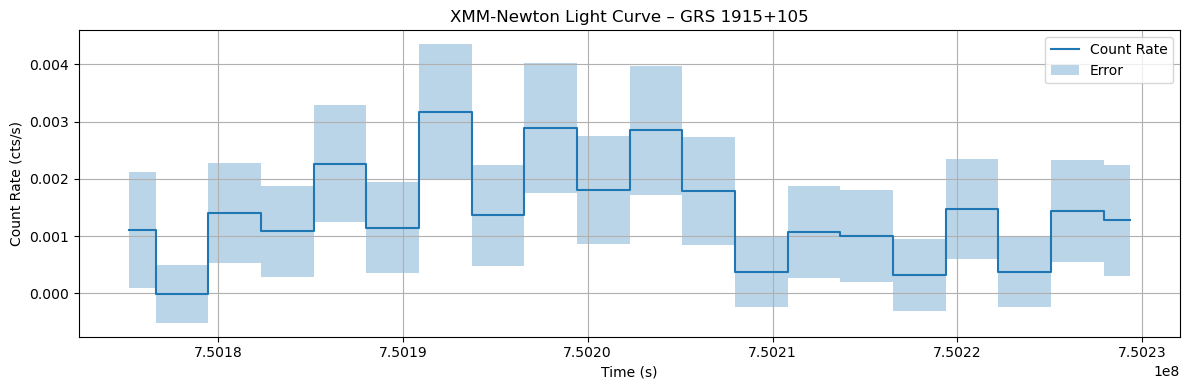

In [7]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt

# ✅ Your chosen light curve FITS file
filename = "xmm_data/0864960101/0864960101/pps/P0864960101M1S001SRCTSR8002.FTZ"

# Open and read the FITS file
with fits.open(filename) as hdul:
    data = hdul[1].data
    time = data['TIME']
    rate = data['RATE']
    error = data['ERROR'] if 'ERROR' in data.columns.names else None

# 📊 Plot light curve
plt.figure(figsize=(12, 4))
plt.plot(time, rate, drawstyle='steps-mid', label='Count Rate')
if error is not None:
    plt.fill_between(time, rate - error, rate + error, step='mid', alpha=0.3, label='Error')
plt.xlabel('Time (s)')
plt.ylabel('Count Rate (cts/s)')
plt.title('XMM-Newton Light Curve – GRS 1915+105')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 20, using nperseg = 20
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


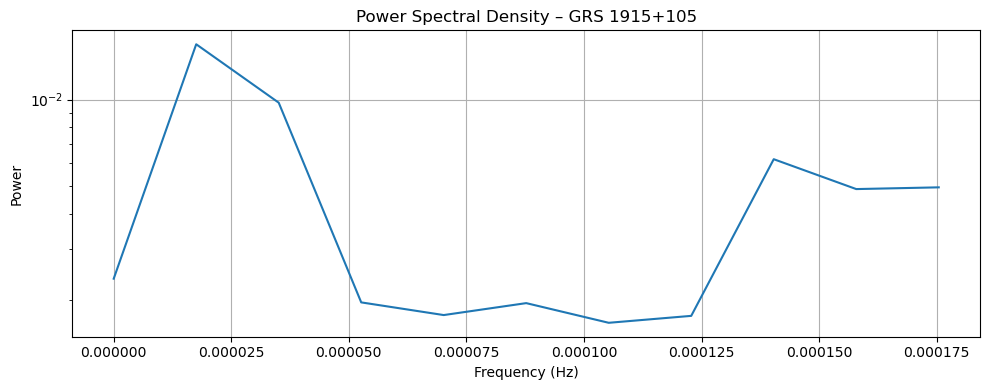

In [8]:
from scipy.signal import welch
import numpy as np

# Remove any NaNs or gaps
valid = np.isfinite(rate)
time_clean = time[valid]
rate_clean = rate[valid]

# Estimate sampling rate
dt = np.median(np.diff(time_clean))
fs = 1.0 / dt  # sampling frequency (Hz)

# Compute Power Spectral Density using Welch's method
frequencies, power = welch(rate_clean, fs=fs, nperseg=256)

# Plot the Power Spectrum
plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Power Spectral Density – GRS 1915+105")
plt.grid(True)
plt.tight_layout()
plt.show()


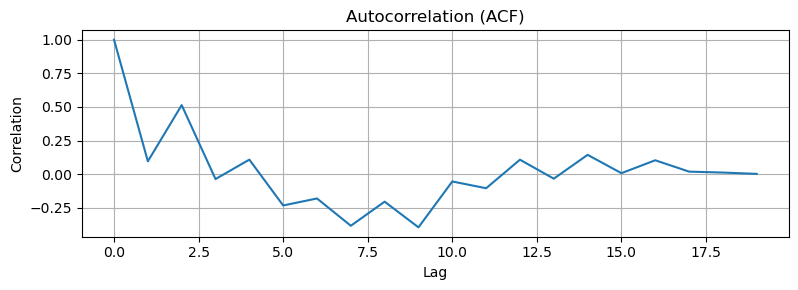

In [9]:
from statsmodels.tsa.stattools import acf

autocorr = acf(rate_clean, nlags=100, fft=True)

plt.figure(figsize=(8, 3))
plt.plot(autocorr)
plt.title("Autocorrelation (ACF)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()


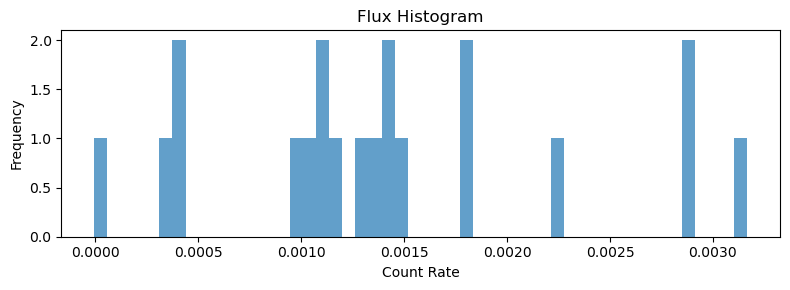

In [10]:
plt.figure(figsize=(8, 3))
plt.hist(rate_clean, bins=50, alpha=0.7)
plt.title("Flux Histogram")
plt.xlabel("Count Rate")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


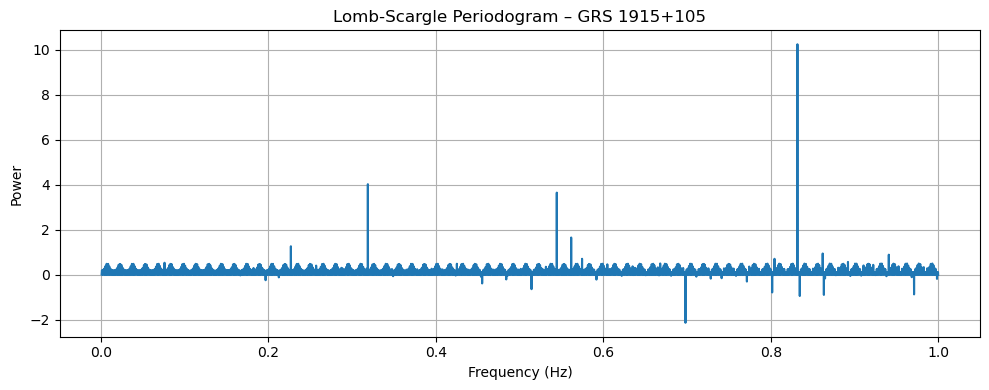

In [11]:
from astropy.timeseries import LombScargle

# Clean time and flux
time_clean = time[valid]
rate_clean = rate[valid]

# Define frequency range
min_freq = 0.001
max_freq = 1.0
frequency = np.linspace(min_freq, max_freq, 5000)

# Compute Lomb-Scargle
power = LombScargle(time_clean, rate_clean).power(frequency)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(frequency, power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram – GRS 1915+105")
plt.grid(True)
plt.tight_layout()
plt.show()


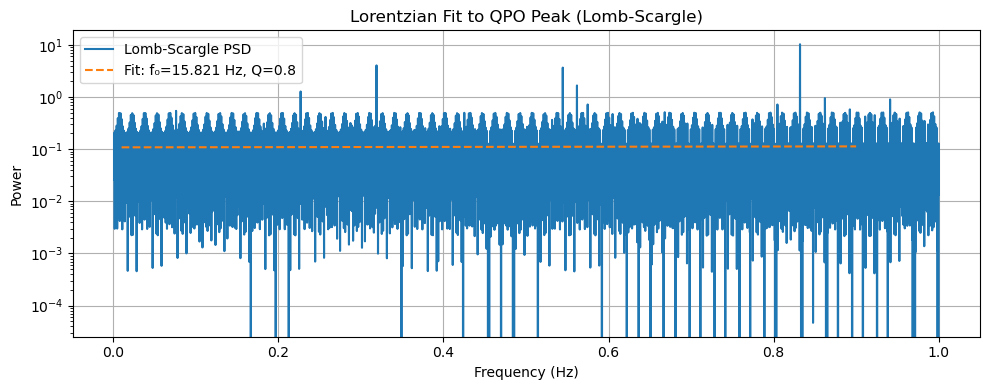

In [15]:

# Define the Lorentzian function
def lorentzian(f, f0, gamma, A):
	return A * (gamma**2 / ((f - f0)**2 + gamma**2))

# Lomb-Scargle (renamed)
frequency_ls = np.linspace(min_freq, max_freq, 5000)
power_ls = LombScargle(time_clean, rate_clean).power(frequency_ls)

# Now fit using correct arrays
peak_mask = (frequency_ls > 0.01) & (frequency_ls < 0.9)

f_fit = frequency_ls[peak_mask]
P_fit = power_ls[peak_mask]

# Fit Lorentzian
popt, _ = curve_fit(lorentzian, f_fit, P_fit, p0=[0.1, 0.05, np.max(P_fit)])
f0, gamma, A = popt
q_factor = f0 / gamma if gamma != 0 else np.inf

# Plot
plt.figure(figsize=(10, 4))
plt.semilogy(frequency_ls, power_ls, label="Lomb-Scargle PSD")
plt.semilogy(f_fit, lorentzian(f_fit, *popt), '--', label=f"Fit: f₀={f0:.3f} Hz, Q={q_factor:.1f}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Lorentzian Fit to QPO Peak (Lomb-Scargle)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


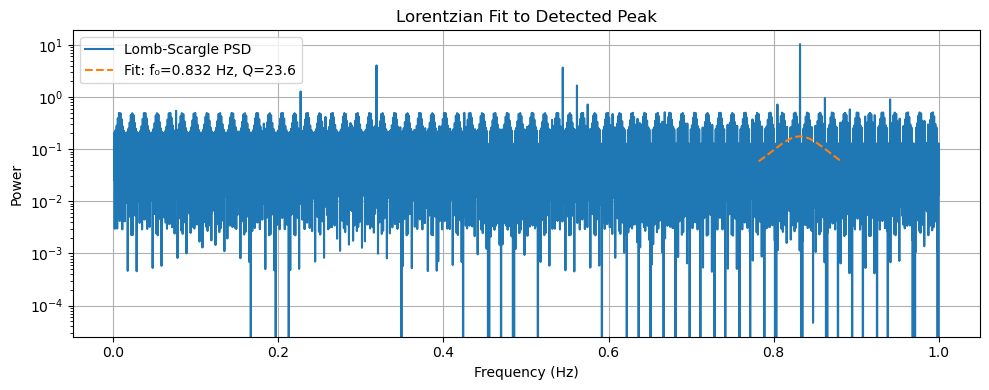

In [16]:
peak_idx = np.argmax(power_ls)
f0_guess = frequency_ls[peak_idx]

# Define a narrow window around it
fit_window = 0.05  # Hz
peak_mask = (frequency_ls > (f0_guess - fit_window)) & (frequency_ls < (f0_guess + fit_window))

f_fit = frequency_ls[peak_mask]
P_fit = power_ls[peak_mask]

# Fit if enough points
if len(f_fit) > 5:
    popt, _ = curve_fit(lorentzian, f_fit, P_fit, p0=[f0_guess, 0.05, np.max(P_fit)])
    f0, gamma, A = popt
    q_factor = f0 / gamma if gamma != 0 else np.inf

    plt.figure(figsize=(10, 4))
    plt.semilogy(frequency_ls, power_ls, label="Lomb-Scargle PSD")
    plt.semilogy(f_fit, lorentzian(f_fit, *popt), '--', label=f"Fit: f₀={f0:.3f} Hz, Q={q_factor:.1f}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.title("Lorentzian Fit to Detected Peak")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough points near the peak to fit.")


In [17]:
import torch
from scipy.interpolate import interp1d

# Match frequency and PSD resolution to SBI prior
target_freqs = np.linspace(0.01, 0.5, 129)  # same range & points as Welch nperseg=256
interp_psd = interp1d(frequency_ls, power_ls, bounds_error=False, fill_value=0)
P_interp = interp_psd(target_freqs)
P_interp = np.nan_to_num(P_interp)

x_obs = torch.tensor(P_interp, dtype=torch.float32)


In [18]:
# Save x_obs to file (as a NumPy array)
np.save("xmm_qpo_psd_obs.npy", x_obs.numpy())
print("✅ Saved x_obs to xmm_qpo_psd_obs.npy")


✅ Saved x_obs to xmm_qpo_psd_obs.npy
